In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('data.xlsx','rural_urban')
data

,Type,Month,Year,Deaths
0,Urban,Jan,2017,11432
1,Urban,Feb,2017,9452
2,Urban,Mar,2017,9813
3,Urban,Apr,2017,9523
4,Urban,May,2017,9767
...,...,...,...,...
139,Rural,Aug,2022,1071
140,Rural,Sep,2022,1060
141,Rural,Oct,2022,1326
142,Rural,Nov,2022,1534


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    144 non-null    object
 1   Month   144 non-null    object
 2   Year    144 non-null    int64 
 3   Deaths  144 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.6+ KB


In [4]:
data.describe()

,Year,Deaths
count,144.000000,144.000000
mean,2019.500000,6036.840278
std,1.713786,5274.681292
min,2017.000000,921.000000
25%,2018.000000,1369.500000
50%,2019.500000,4888.500000
75%,2021.000000,9818.500000
max,2022.000000,33791.000000


In [5]:
urban = data[data['Type'] == 'Urban ']

In [6]:
urban

,Type,Month,Year,Deaths
0,Urban,Jan,2017,11432
1,Urban,Feb,2017,9452
2,Urban,Mar,2017,9813
3,Urban,Apr,2017,9523
4,Urban,May,2017,9767
...,...,...,...,...
127,Urban,Aug,2022,10093
128,Urban,Sep,2022,8811
129,Urban,Oct,2022,9641
130,Urban,Nov,2022,8989


In [7]:
urban.describe()

,Year,Deaths
count,72.00000,72.000000
mean,2019.50000,10643.583333
std,1.71981,3591.319545
min,2017.00000,7365.000000
25%,2018.00000,9267.250000
50%,2019.50000,9824.000000
75%,2021.00000,10814.250000
max,2022.00000,33791.000000


### Deaths in Delhi (Urban)

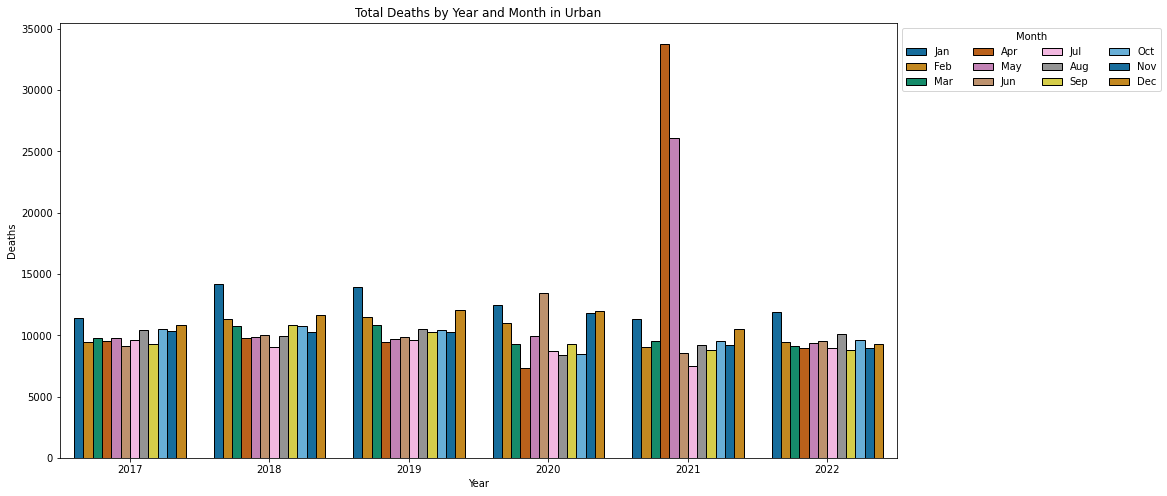

In [8]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = urban.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)

grouped_data = grouped_data.sort_values(['Year', 'Month'])

plt.figure(figsize=(15, 8))
sns.barplot(data=grouped_data, x='Year', y='Deaths', hue='Month', hue_order=month_order, edgecolor='black', linewidth=1,palette = "colorblind")
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left', ncol=4)
plt.title('Total Deaths by Year and Month in Urban')
plt.show()


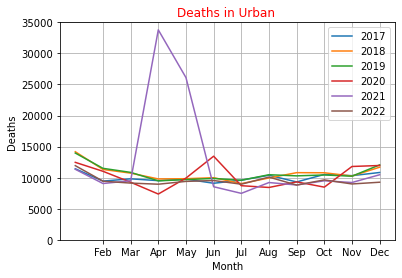

In [9]:
plt.title('Deaths in Urban ',color='r')
plt.xlabel('Month')
plt.xticks(range(1, 13, 1))
plt.ylim(0, 35000)
plt.yticks(np.arange(0, 35001, 5000))
plt.ylabel('Deaths')
urban.set_index('Month', inplace=True)
urban.groupby('Year')['Deaths'].plot(legend=True)
plt.grid()

### Deaths in Delhi (Rural)

In [10]:
rural = data[data['Type'] == 'Rural']

In [11]:
rural

,Type,Month,Year,Deaths
60,Rural,Jan,2017,1379
61,Rural,Feb,2017,1116
62,Rural,Mar,2017,1239
63,Rural,Apr,2017,1046
64,Rural,May,2017,1415
...,...,...,...,...
139,Rural,Aug,2022,1071
140,Rural,Sep,2022,1060
141,Rural,Oct,2022,1326
142,Rural,Nov,2022,1534


In [12]:
rural.describe()

,Year,Deaths
count,72.00000,72.000000
mean,2019.50000,1430.097222
std,1.71981,311.197648
min,2017.00000,921.000000
25%,2018.00000,1215.750000
50%,2019.50000,1369.000000
75%,2021.00000,1601.500000
max,2022.00000,2412.000000


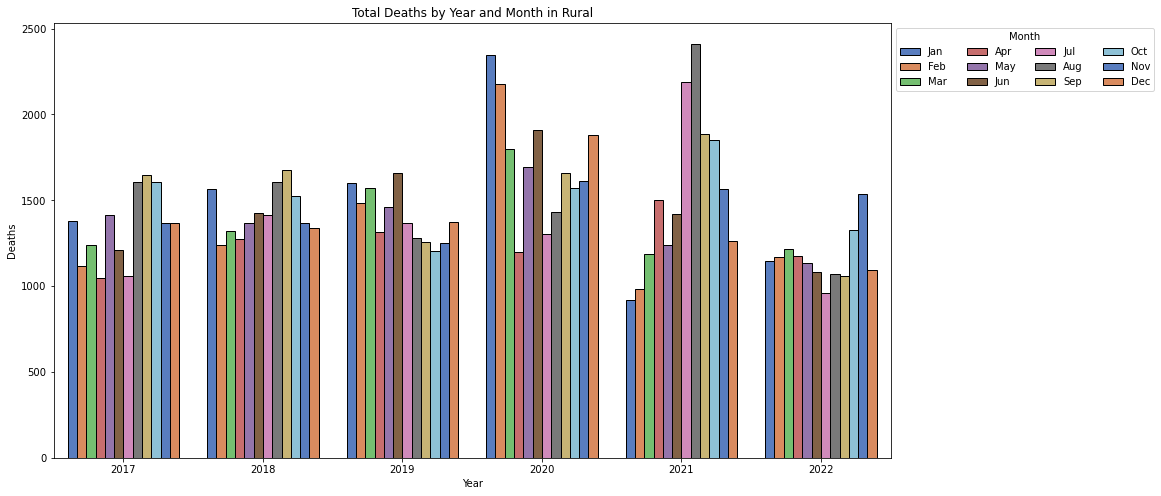

In [13]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

rural_data = rural.groupby(['Year', 'Month'])['Deaths'].sum().reset_index()
rural_data['Month'] = pd.Categorical(rural_data['Month'], categories=month_order, ordered=True)

rural_data = rural_data.sort_values(['Year', 'Month'])

plt.figure(figsize=(15, 8))
sns.barplot(data=rural_data, x='Year', y='Deaths', hue='Month', hue_order=month_order, edgecolor='black', linewidth=1,palette = "muted")
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left', ncol=4)
plt.title('Total Deaths by Year and Month in Rural')
plt.show()

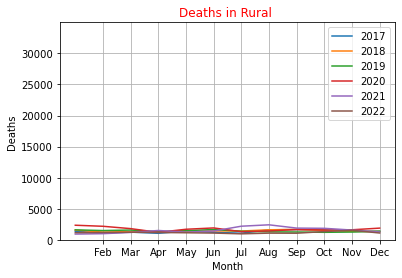

In [14]:
plt.title('Deaths in Rural ',color='r')
plt.xlabel('Month')
plt.xticks(range(1, 13, 1))
plt.ylim(0, 35000)
plt.yticks(np.arange(0, 35000, 5000))
plt.ylabel('Deaths')
rural.set_index('Month', inplace=True)
rural.groupby('Year')['Deaths'].plot(legend=True)
plt.grid()

## Yearwise

### Deaths in 2017 (Rural vs Urban)

In [15]:
deaths_2017 = data[data['Year'] == 2017]
print(deaths_2017)

      Type Month  Year  Deaths
0   Urban    Jan  2017   11432
1   Urban    Feb  2017    9452
2   Urban    Mar  2017    9813
3   Urban    Apr  2017    9523
4   Urban    May  2017    9767
5   Urban    Jun  2017    9100
6   Urban    Jul  2017    9597
7   Urban    Aug  2017   10389
8   Urban    Sep  2017    9311
9   Urban    Oct  2017   10522
10  Urban    Nov  2017   10322
11  Urban    Dec  2017   10836
60   Rural   Jan  2017    1379
61   Rural   Feb  2017    1116
62   Rural   Mar  2017    1239
63   Rural   Apr  2017    1046
64   Rural   May  2017    1415
65   Rural   Jun  2017    1209
66   Rural   Jul  2017    1059
67   Rural   Aug  2017    1606
68   Rural   Sep  2017    1645
69   Rural   Oct  2017    1608
70   Rural   Nov  2017    1365
71   Rural   Dec  2017    1366


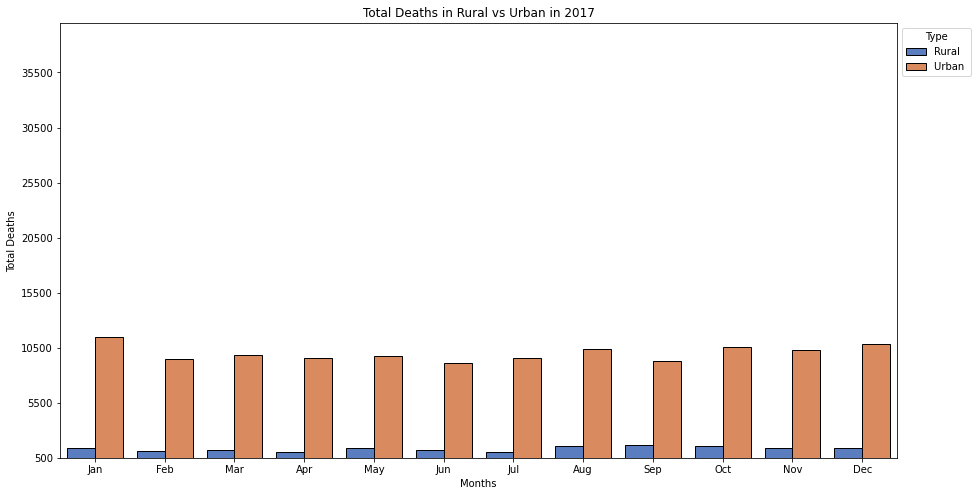

In [16]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = deaths_2017.groupby(['Type', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Month'])
plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Month', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2017')
g.set(ylim=(500, 40000))
g.set_yticks(range(500, 40000, 5000))
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.show()


### Deaths in 2018 ( Rural vs Urban)

In [17]:
deaths_2018 = data[data['Year'] == 2018]
print(deaths_2018)

      Type Month  Year  Deaths
12  Urban    Jan  2018   14178
13  Urban    Feb  2018   11323
14  Urban    Mar  2018   10733
15  Urban    Apr  2018    9796
16  Urban    May  2018    9835
17  Urban    Jun  2018    9998
18  Urban    Jul  2018    9042
19  Urban    Aug  2018    9953
20  Urban    Sep  2018   10807
21  Urban    Oct  2018   10791
22  Urban    Nov  2018   10264
23  Urban    Dec  2018   11684
72   Rural   Jan  2018    1567
73   Rural   Feb  2018    1242
74   Rural   Mar  2018    1320
75   Rural   Apr  2018    1277
76   Rural   May  2018    1368
77   Rural   Jun  2018    1426
78   Rural   Jul  2018    1414
79   Rural   Aug  2018    1609
80   Rural   Sep  2018    1674
81   Rural   Oct  2018    1525
82   Rural   Nov  2018    1366
83   Rural   Dec  2018    1341


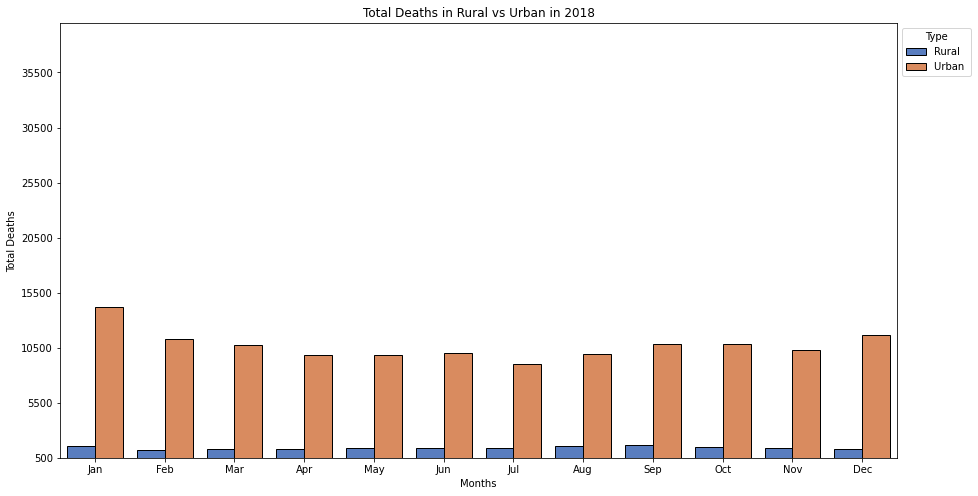

In [18]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = deaths_2018.groupby(['Type', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Month'])

plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Month', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2018')
g.set(ylim=(500, 40000))
g.set_yticks(range(500, 40000, 5000))
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.show()


### Deaths in 2019 ( Rural vs Urban)

In [19]:
deaths_2019 = data[data['Year'] == 2019]
print(deaths_2019)

      Type Month  Year  Deaths
24  Urban    Jan  2019   13965
25  Urban    Feb  2019   11504
26  Urban    Mar  2019   10852
27  Urban    Apr  2019    9488
28  Urban    May  2019    9691
29  Urban    Jun  2019    9875
30  Urban    Jul  2019    9586
31  Urban    Aug  2019   10476
32  Urban    Sep  2019   10292
33  Urban    Oct  2019   10435
34  Urban    Nov  2019   10241
35  Urban    Dec  2019   12057
84   Rural   Jan  2019    1600
85   Rural   Feb  2019    1486
86   Rural   Mar  2019    1571
87   Rural   Apr  2019    1314
88   Rural   May  2019    1462
89   Rural   Jun  2019    1656
90   Rural   Jul  2019    1370
91   Rural   Aug  2019    1278
92   Rural   Sep  2019    1258
93   Rural   Oct  2019    1204
94   Rural   Nov  2019    1251
95   Rural   Dec  2019    1372


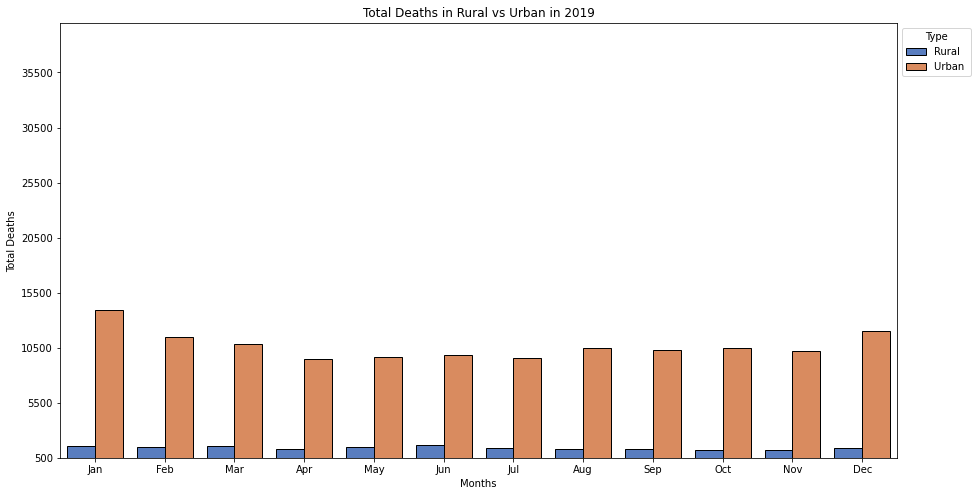

In [20]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = deaths_2019.groupby(['Type', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Month'])

plt.figure(figsize=(15, 8))
g = sns.barplot(data=grouped_data, x='Month', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2019')
g.set(ylim=(500, 40000))
g.set_yticks(range(500, 40000, 5000))
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.show()

### Deaths in 2020 ( Rural vs Urban)

In [21]:
deaths_2020 = data[data['Year'] == 2020]
print(deaths_2020)

       Type Month  Year  Deaths
36   Urban    Jan  2020   12467
37   Urban    Feb  2020   11027
38   Urban    Mar  2020    9265
39   Urban    Apr  2020    7365
40   Urban    May  2020    9935
41   Urban    Jun  2020   13455
42   Urban    Jul  2020    8708
43   Urban    Aug  2020    8424
44   Urban    Sep  2020    9324
45   Urban    Oct  2020    8476
46   Urban    Nov  2020   11802
47   Urban    Dec  2020   11960
96    Rural   Jan  2020    2345
97    Rural   Feb  2020    2176
98    Rural   Mar  2020    1799
99    Rural   Apr  2020    1200
100   Rural   May  2020    1696
101   Rural   Jun  2020    1909
102   Rural   Jul  2020    1306
103   Rural   Aug  2020    1430
104   Rural   Sep  2020    1657
105   Rural   Oct  2020    1570
106   Rural   Nov  2020    1613
107   Rural   Dec  2020    1880


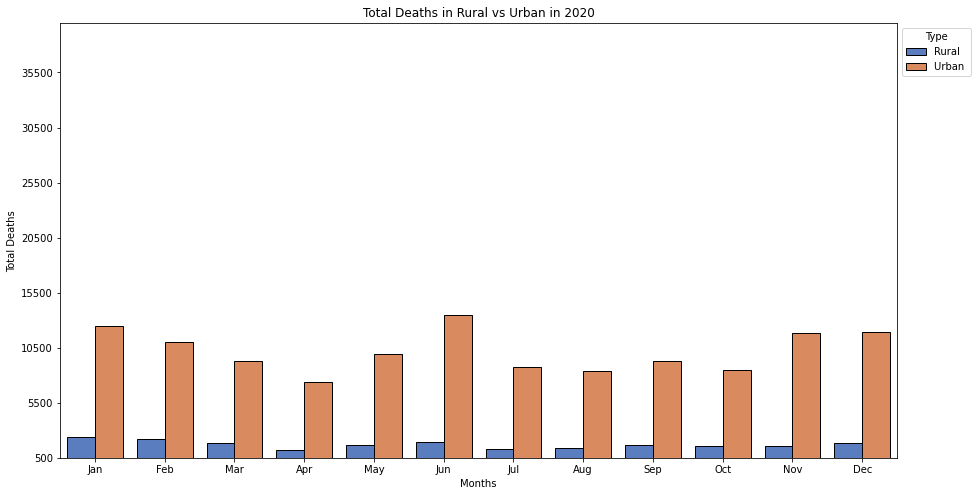

In [22]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = deaths_2020.groupby(['Type', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Month'])

plt.figure(figsize=(15, 8))
g= sns.barplot(data=grouped_data, x='Month', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2020')
g.set(ylim=(500, 40000))
g.set_yticks(range(500, 40000, 5000))
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.show()

### Deaths in 2021 ( Rural vs Urban)

In [23]:
deaths_2021 = data[data['Year'] == 2021]
print(deaths_2021)

       Type Month  Year  Deaths
48   Urban    Jan  2021   11352
49   Urban    Feb  2021    9059
50   Urban    Mar  2021    9504
51   Urban    Apr  2021   33791
52   Urban    May  2021   26106
53   Urban    Jun  2021    8541
54   Urban    Jul  2021    7475
55   Urban    Aug  2021    9217
56   Urban    Sep  2021    8823
57   Urban    Oct  2021    9500
58   Urban    Nov  2021    9223
59   Urban    Dec  2021   10470
108   Rural   Jan  2021     921
109   Rural   Feb  2021     985
110   Rural   Mar  2021    1187
111   Rural   Apr  2021    1500
112   Rural   May  2021    1240
113   Rural   Jun  2021    1417
114   Rural   Jul  2021    2188
115   Rural   Aug  2021    2412
116   Rural   Sep  2021    1884
117   Rural   Oct  2021    1849
118   Rural   Nov  2021    1568
119   Rural   Dec  2021    1264


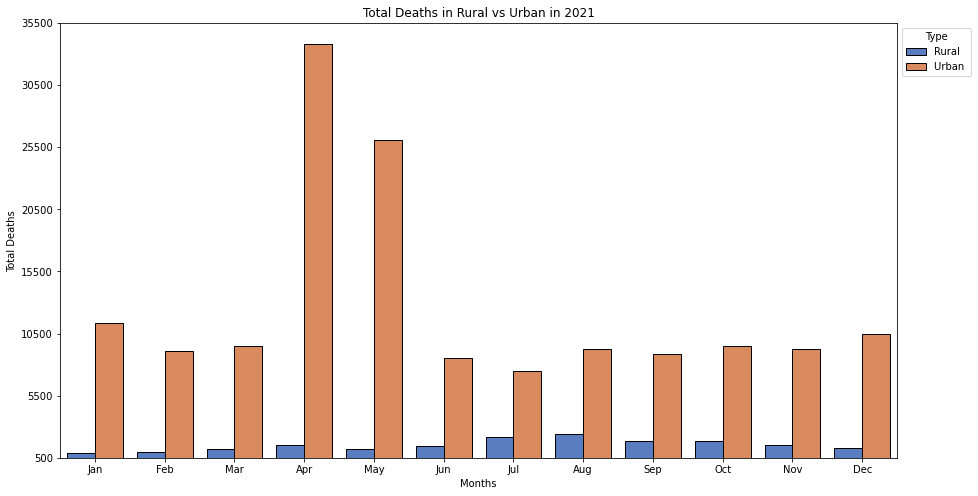

In [24]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = deaths_2021.groupby(['Type', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Month'])

plt.figure(figsize=(15, 8))
g= sns.barplot(data=grouped_data, x='Month', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2021')
g.set(ylim=(500, 4000))
g.set_yticks(range(500, 40000, 5000))
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.show()

### Deaths in 2022 ( Rural vs Urban)

In [25]:
deaths_2022 = data[data['Year'] == 2022]
print(deaths_2022)

       Type Month  Year  Deaths
120  Urban    Jan  2022   11935
121  Urban    Feb  2022    9434
122  Urban    Mar  2022    9128
123  Urban    Apr  2022    8949
124  Urban    May  2022    9401
125  Urban    Jun  2022    9540
126  Urban    Jul  2022    8950
127  Urban    Aug  2022   10093
128  Urban    Sep  2022    8811
129  Urban    Oct  2022    9641
130  Urban    Nov  2022    8989
131  Urban    Dec  2022    9268
132   Rural   Jan  2022    1147
133   Rural   Feb  2022    1169
134   Rural   Mar  2022    1218
135   Rural   Apr  2022    1175
136   Rural   May  2022    1133
137   Rural   Jun  2022    1083
138   Rural   Jul  2022     959
139   Rural   Aug  2022    1071
140   Rural   Sep  2022    1060
141   Rural   Oct  2022    1326
142   Rural   Nov  2022    1534
143   Rural   Dec  2022    1092


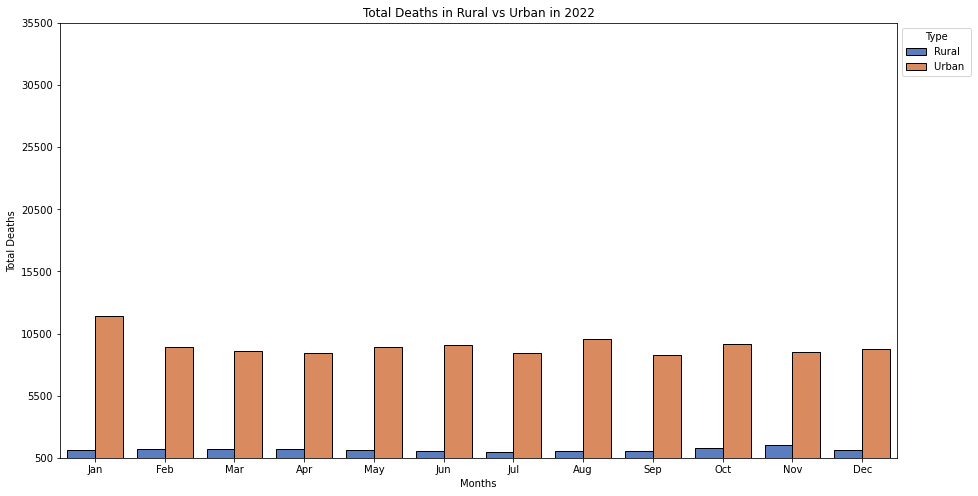

In [26]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

grouped_data = deaths_2022.groupby(['Type', 'Month'])['Deaths'].sum().reset_index()
grouped_data['Month'] = pd.Categorical(grouped_data['Month'], categories=month_order, ordered=True)
grouped_data = grouped_data.sort_values(['Type', 'Month'])

plt.figure(figsize=(15, 8))
g= sns.barplot(data=grouped_data, x='Month', y='Deaths', hue='Type', edgecolor='black', linewidth=1, palette="muted")
plt.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Total Deaths in Rural vs Urban in 2022')
g.set(ylim=(500, 4000))
g.set_yticks(range(500, 40000, 5000))
plt.xlabel('Months')
plt.ylabel('Total Deaths')
plt.show()

In [27]:
quater_data = pd.read_excel('data.xlsx', 'quaters')
quater_data

,Months,Quarters,Year,Type,Deaths
0,(Jan 17 - Mar 17),Q1,17,Urban,30697
1,(Apr 17 - Jun 17),Q2,17,Urban,28390
2,(Jul 17 - Sep 17),Q3,17,Urban,29297
3,(Oct 17 - Dec 17),Q4,17,Urban,31680
4,(Jan 18 - Mar 18),Q1,18,Urban,36234
5,(Apr 18 - Jun 18),Q2,18,Urban,29629
6,(Jul 18 - Sep 18),Q3,18,Urban,29802
7,(Oct 18 - Dec 18),Q4,18,Urban,32739
8,(Jan 19 - Mar 19),Q1,19,Urban,36321
9,(Apr 19 - Jun 19),Q2,19,Urban,29054


### Quaterwise

In [28]:
q1 = quater_data[(quater_data['Quarters'] == 'Q1' )]
q1

,Months,Quarters,Year,Type,Deaths
0,(Jan 17 - Mar 17),Q1,17,Urban,30697
4,(Jan 18 - Mar 18),Q1,18,Urban,36234
8,(Jan 19 - Mar 19),Q1,19,Urban,36321
12,(Jan 20 - Mar 20),Q1,20,Urban,32759
16,(Jan 21 - Mar 21),Q1,21,Urban,29915
20,(Jan 22 - Mar 22),Q1,22,Urban,30497
24,(Jan 17 - Mar 17),Q1,17,Rural,3734
28,(Jan 18 - Mar 18),Q1,18,Rural,4129
32,(Jan 19 - Mar 19),Q1,19,Rural,4657
36,(Jan 20 - Mar 20),Q1,20,Rural,6320


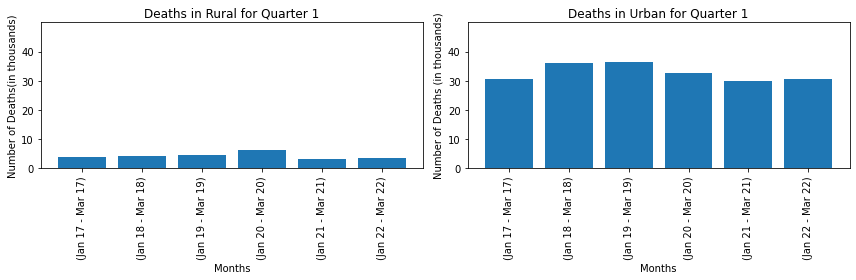

In [29]:
y1 = q1[q1['Type'] == 'Rural']['Deaths'] /1000
y2 = q1[q1['Type'] == 'Urban']['Deaths'] /1000
x = q1['Months'].unique() 

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(x, y1)
axs[0].set_title('Deaths in Rural for Quarter 1')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Number of Deaths(in thousands)')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(ylim=(0, 50))
axs[0].set_yticks(range(0, 50, 10))

axs[1].bar(x, y2)
axs[1].set_title('Deaths in Urban for Quarter 1')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Number of Deaths (in thousands)')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(ylim=(0, 50))
axs[1].set_yticks(range(0, 50, 10))

plt.tight_layout()
plt.show()

In [30]:
q2 = quater_data[(quater_data['Quarters'] == 'Q2' )]
q2

,Months,Quarters,Year,Type,Deaths
1,(Apr 17 - Jun 17),Q2,17,Urban,28390
5,(Apr 18 - Jun 18),Q2,18,Urban,29629
9,(Apr 19 - Jun 19),Q2,19,Urban,29054
13,(Apr 20 - Jun 20),Q2,20,Urban,30755
17,(Apr 21 - Jun 21),Q2,21,Urban,68438
21,(Apr 22 - Jun 22),Q2,22,Urban,27890
25,(Apr 17 - Jun 17),Q2,17,Rural,3670
29,(Apr 18 - Jun 18),Q2,18,Rural,4071
33,(Apr 19 - Jun 19),Q2,19,Rural,4432
37,(Apr 20 - Jun 20),Q2,20,Rural,4805


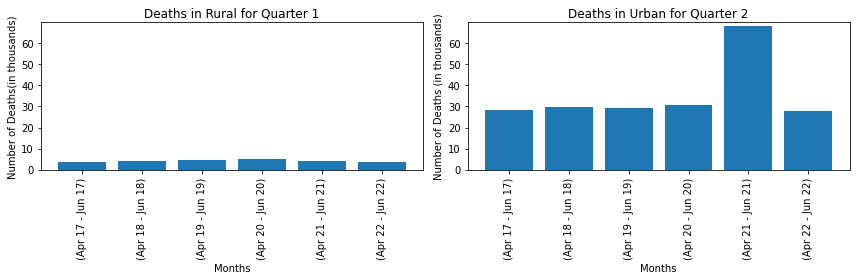

In [31]:
y1 = q2[q2['Type'] == 'Rural']['Deaths'] /1000
y2 = q2[q2['Type'] == 'Urban']['Deaths'] /1000
x = q2['Months'].unique() 

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(x, y1)
axs[0].set_title('Deaths in Rural for Quarter 1')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Number of Deaths(in thousands)')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(ylim=(0, 70))
axs[0].set_yticks(range(0, 70, 10))

axs[1].bar(x, y2)
axs[1].set_title('Deaths in Urban for Quarter 2')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Number of Deaths (in thousands)')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(ylim=(0, 70))
axs[1].set_yticks(range(0, 70, 10))

plt.tight_layout()
plt.show()

In [32]:
q3 = quater_data[(quater_data['Quarters'] == 'Q3' )]
q3

,Months,Quarters,Year,Type,Deaths
2,(Jul 17 - Sep 17),Q3,17,Urban,29297
6,(Jul 18 - Sep 18),Q3,18,Urban,29802
10,(Jul 19 - Sep 19),Q3,19,Urban,30354
14,(Jul 20 - Sep 20),Q3,20,Urban,26456
18,(Jul 21 - Sep 21),Q3,21,Urban,25515
22,(Jul 22 - Sep 22),Q3,22,Urban,27854
26,(Jul 17 - Sep 17),Q3,17,Rural,4310
30,(Jul 18 - Sep 18),Q3,18,Rural,4697
34,(Jul 19 - Sep 19),Q3,19,Rural,3906
38,(Jul 20 - Sep 20),Q3,20,Rural,4393


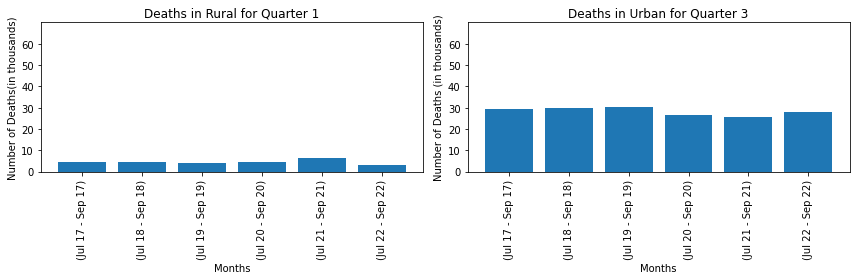

In [33]:
y1 = q3[q3['Type'] == 'Rural']['Deaths'] /1000
y2 = q3[q3['Type'] == 'Urban']['Deaths'] /1000
x = q3['Months'].unique() 

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(x, y1)
axs[0].set_title('Deaths in Rural for Quarter 1')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Number of Deaths(in thousands)')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(ylim=(0, 70))
axs[0].set_yticks(range(0, 70, 10))

axs[1].bar(x, y2)
axs[1].set_title('Deaths in Urban for Quarter 3')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Number of Deaths (in thousands)')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(ylim=(0, 70))
axs[1].set_yticks(range(0, 70, 10))

plt.tight_layout()
plt.show()

In [34]:
q4 = quater_data[(quater_data['Quarters'] == 'Q4' )]
q4

,Months,Quarters,Year,Type,Deaths
3,(Oct 17 - Dec 17),Q4,17,Urban,31680
7,(Oct 18 - Dec 18),Q4,18,Urban,32739
11,(Oct 19 - Dec 19),Q4,19,Urban,32733
15,(Oct 20 - Dec 20),Q4,20,Urban,32238
19,(Oct 21 - Dec 21),Q4,21,Urban,29193
23,(Oct 22 - Dec 22),Q4,22,Urban,27898
27,(Oct 17 - Dec 17),Q4,17,Rural,4339
31,(Oct 18 - Dec 18),Q4,18,Rural,4232
35,(Oct 19 - Dec 19),Q4,19,Rural,3827
39,(Oct 20 - Dec 20),Q4,20,Rural,5063


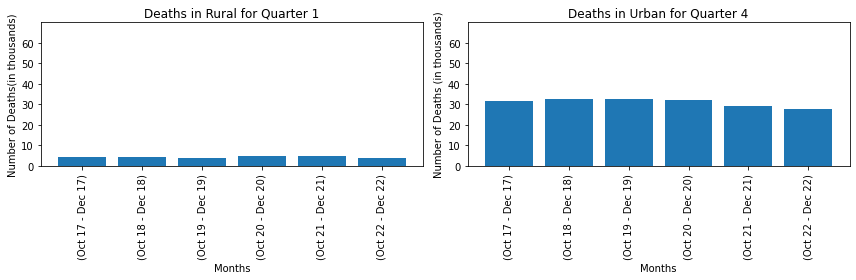

In [35]:
y1 = q4[q4['Type'] == 'Rural']['Deaths'] /1000
y2 = q4[q4['Type'] == 'Urban']['Deaths'] /1000
x = q4['Months'].unique() 

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(x, y1)
axs[0].set_title('Deaths in Rural for Quarter 1')
axs[0].set_xlabel('Months')
axs[0].set_ylabel('Number of Deaths(in thousands)')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set(ylim=(0, 70))
axs[0].set_yticks(range(0, 70, 10))

axs[1].bar(x, y2)
axs[1].set_title('Deaths in Urban for Quarter 4')
axs[1].set_xlabel('Months')
axs[1].set_ylabel('Number of Deaths (in thousands)')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set(ylim=(0, 70))
axs[1].set_yticks(range(0, 70, 10))

plt.tight_layout()
plt.show()

In [36]:
s17 = deaths_2017['Deaths'].sum()
s18 = deaths_2018['Deaths'].sum()
s19 = deaths_2019['Deaths'].sum()
s20 = deaths_2020['Deaths'].sum()
s21 = deaths_2021['Deaths'].sum()
s22 = deaths_2022['Deaths'].sum()

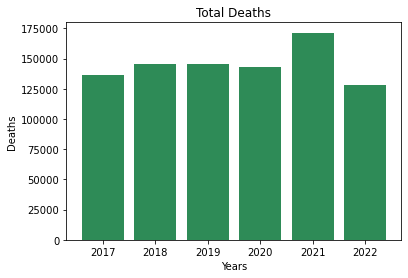

In [40]:
x = [2017,2018,2019,2020,2021,2022]
deaths = [s17, s18, s19, s20, s21, s22]

plt.bar(x,deaths, color = 'seagreen')
plt.title('Total Deaths')
plt.xlabel('Years')
plt.ylabel('Deaths')
plt.show()